In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 373s 2us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),                           # 2nd Conv layer
    MaxPooling2D((2, 2)),                                            # 2nd MaxPooling layer
    Conv2D(128, (3, 3), activation='relu'),                          # 3rd Conv layer
    MaxPooling2D((2, 2)), 
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

E:\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',                # Use Adam optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.3452 - loss: 1.7659 - val_accuracy: 0.5654 - val_loss: 1.2227
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5888 - loss: 1.1491 - val_accuracy: 0.6289 - val_loss: 1.0577
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6585 - loss: 0.9690 - val_accuracy: 0.6587 - val_loss: 0.9725
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7000 - loss: 0.8548 - val_accuracy: 0.6868 - val_loss: 0.8933
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7333 - loss: 0.7667 - val_accuracy: 0.6862 - val_loss: 0.9137
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7537 - loss: 0.6982 - val_accuracy: 0.6990 - val_loss: 0.8725
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7754 - loss: 0.6454 - val_accuracy: 0.7037 - val_loss: 0.8879
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7945 - l

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7319 - loss: 0.8564
Test accuracy: 0.7221


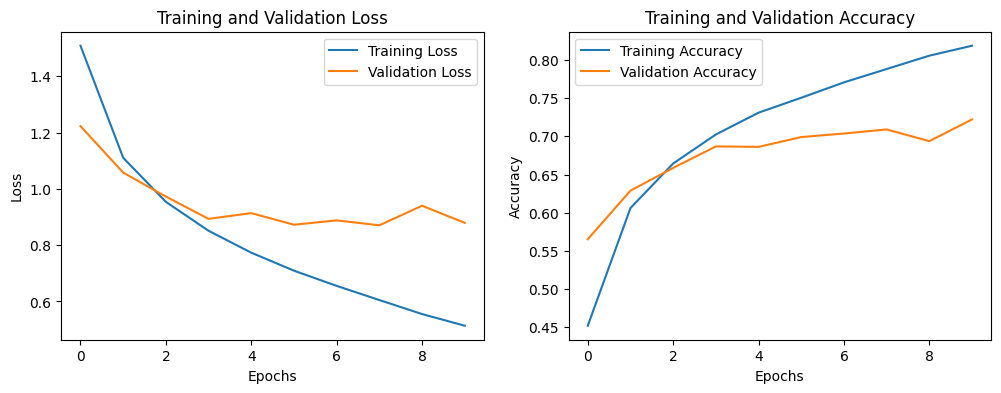

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()